Here we will be using time series analysis for basic calculation such as moving averages etc

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# setting figure size 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [3]:
nifty = pd.read_csv("nifty_it_index.csv")

tcs = pd.read_csv("tcs_stock.csv")

infy = pd.read_csv("infy_stock.csv")


In [4]:
nifty.head(10)


,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10
5,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10
6,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10
7,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10
8,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10
9,2015-01-14,11561.95,11631.55,11521.00,11614.30,12544558,1.438530e+10


In [5]:
tcs.head(10)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
5,2015-01-08,TCS,EQ,2417.70,2442.4,2449.00,2420.55,2446.00,2443.80,2434.81,782704,1.905739e+14,47699,450768,0.5759
6,2015-01-09,TCS,EQ,2443.80,2455.0,2519.90,2450.00,2510.00,2512.30,2490.01,1598821,3.981082e+14,81743,865777,0.5415
7,2015-01-12,TCS,EQ,2512.30,2517.0,2528.00,2480.25,2527.95,2509.70,2497.82,798003,1.993266e+14,58810,451228,0.5654
8,2015-01-13,TCS,EQ,2509.70,2520.0,2530.40,2480.10,2498.00,2497.90,2509.40,734216,1.842440e+14,49993,386133,0.5259
9,2015-01-14,TCS,EQ,2497.90,2516.0,2531.80,2500.50,2525.05,2521.95,2517.54,893548,2.249546e+14,69237,498193,0.5575


In [6]:
infy.head(10)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
5,2015-01-08,INFY,EQ,1963.55,1985.60,1997.00,1950.00,1979.25,1973.45,1972.78,3391230,6.690160e+14,92752,2686012,0.7920
6,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004
7,2015-01-12,INFY,EQ,2074.45,2092.00,2119.20,2075.00,2112.95,2115.95,2099.40,3189722,6.696516e+14,107209,1818800,0.5702
8,2015-01-13,INFY,EQ,2115.95,2107.80,2107.80,2075.00,2092.00,2088.90,2089.42,2200309,4.597374e+14,66676,1385009,0.6295
9,2015-01-14,INFY,EQ,2088.90,2098.50,2133.00,2092.60,2129.00,2128.65,2110.88,2480315,5.235638e+14,53263,1832958,0.7390


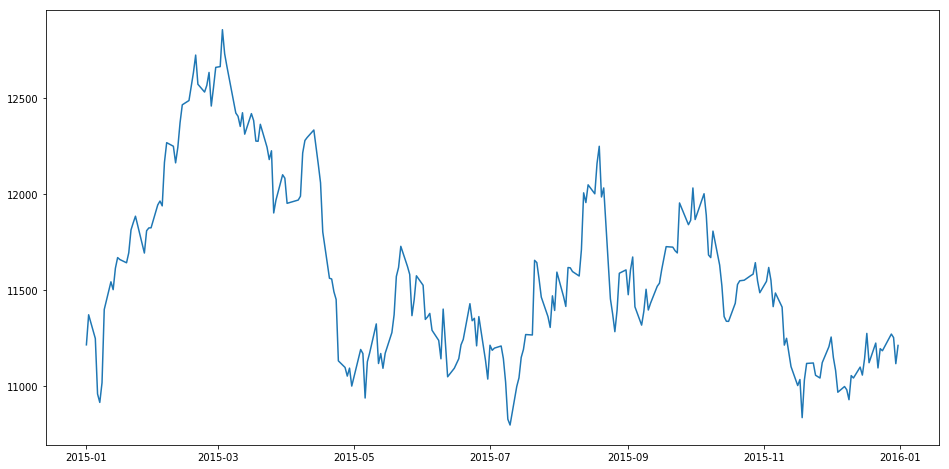

In [8]:
# setting the index as date
nifty['Date'] = pd.to_datetime(nifty.Date , format = '%Y-%m-%d')
nifty.index = nifty['Date']

# plotting
plt.figure(figsize=(16,8))
plt.plot(nifty['Close'], label='Close Price Plotting')


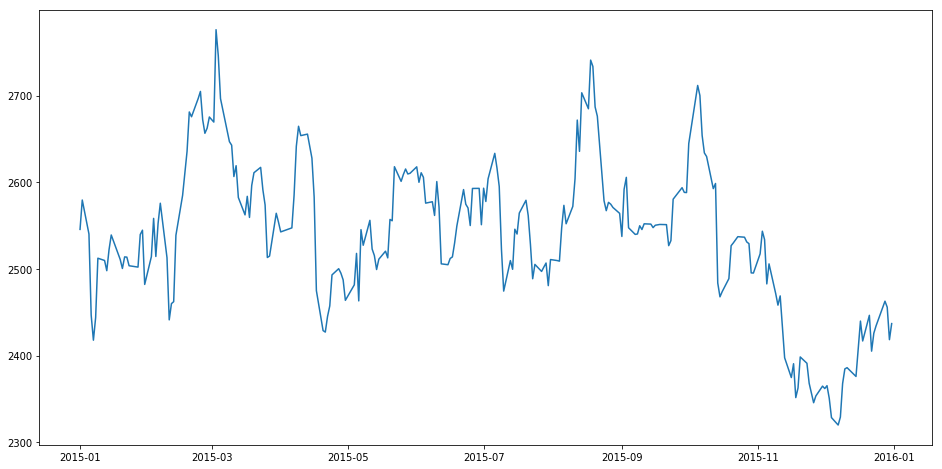

In [9]:
# setting the index as date
tcs['Date'] = pd.to_datetime(tcs.Date , format = '%Y-%m-%d')
tcs.index = tcs['Date']

# plotting
plt.figure(figsize=(16,8))
plt.plot(tcs['Close'], label='Close Price Plotting')


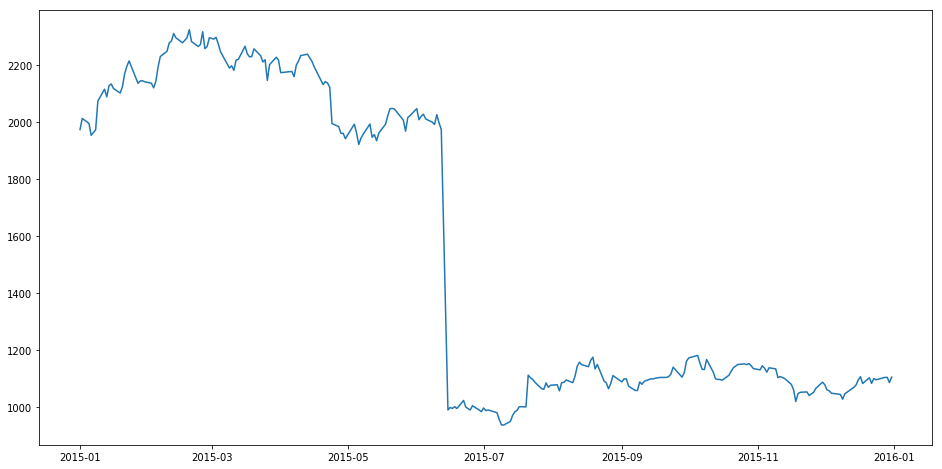

In [10]:
# setting the index as date
infy['Date'] = pd.to_datetime(infy.Date , format = '%Y-%m-%d')
infy.index = infy['Date']

# plotting
plt.figure(figsize=(16,8))
plt.plot(infy['Close'], label='Close Price Plotting')


Following Moving Averages: for 4 weeks: 

 Date
2015-01-04    11293.9000
2015-01-11    11108.4500
2015-01-18    11598.0400
2015-01-25    11777.4900
2015-02-01    11787.9750
2015-02-08    12055.9700
2015-02-15    12298.5000
2015-02-22    12603.9250
2015-03-01    12567.3500
2015-03-08    12728.9250
2015-03-15    12383.0900
2015-03-22    12343.4000
2015-03-29    12104.1300
2015-04-05    12045.3500
2015-04-12    12149.4100
2015-04-19    12087.6000
2015-04-26    11439.2800
2015-05-03    11061.5750
2015-05-10    11120.0700
2015-05-17    11175.8000
2015-05-24    11514.0700
2015-05-31    11519.7300
2015-06-07    11381.0800
2015-06-14    11211.9500
2015-06-21    11163.1100
2015-06-28    11339.5300
2015-07-05    11154.1100
2015-07-12    11000.4400
2015-07-19    11130.7500
2015-07-26    11517.8000
2015-08-02    11425.6200
2015-08-09    11542.7000
2015-08-16    11859.2800
2015-08-23    12085.5600
2015-08-30    11420.2300
2015-09-06    11554.6600
2015-09-13    11408.5000
2015-09-20    11597.5000
20

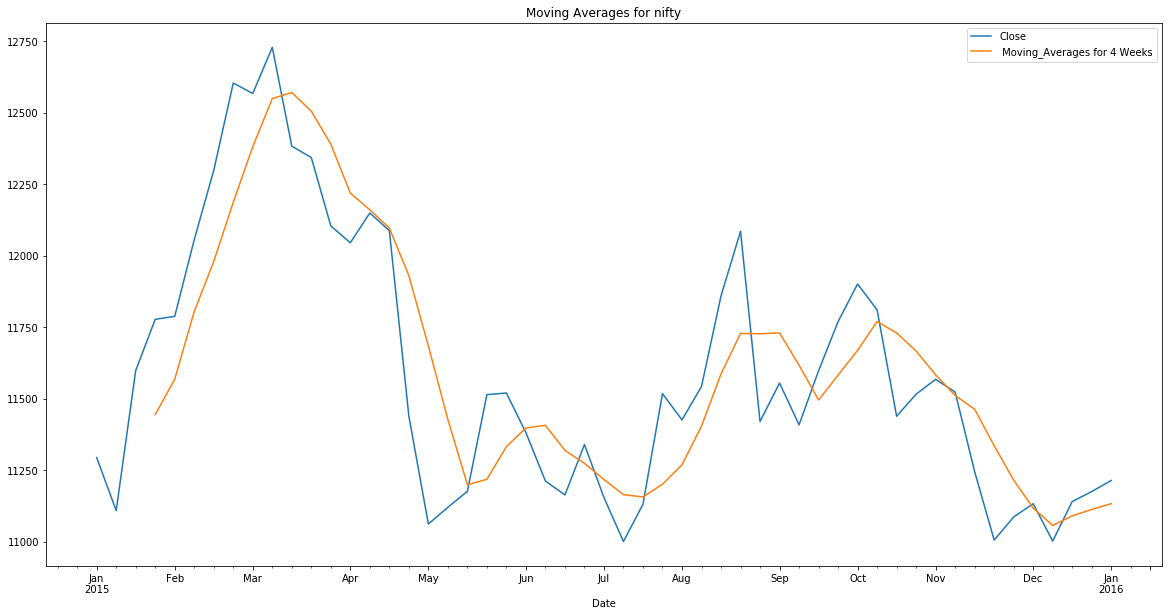

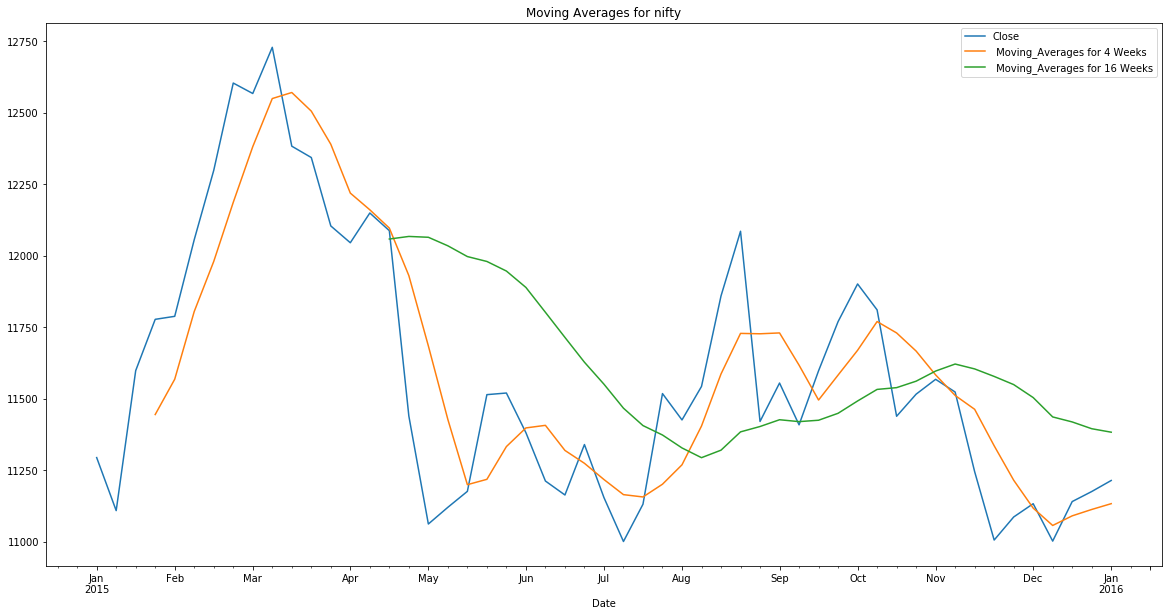

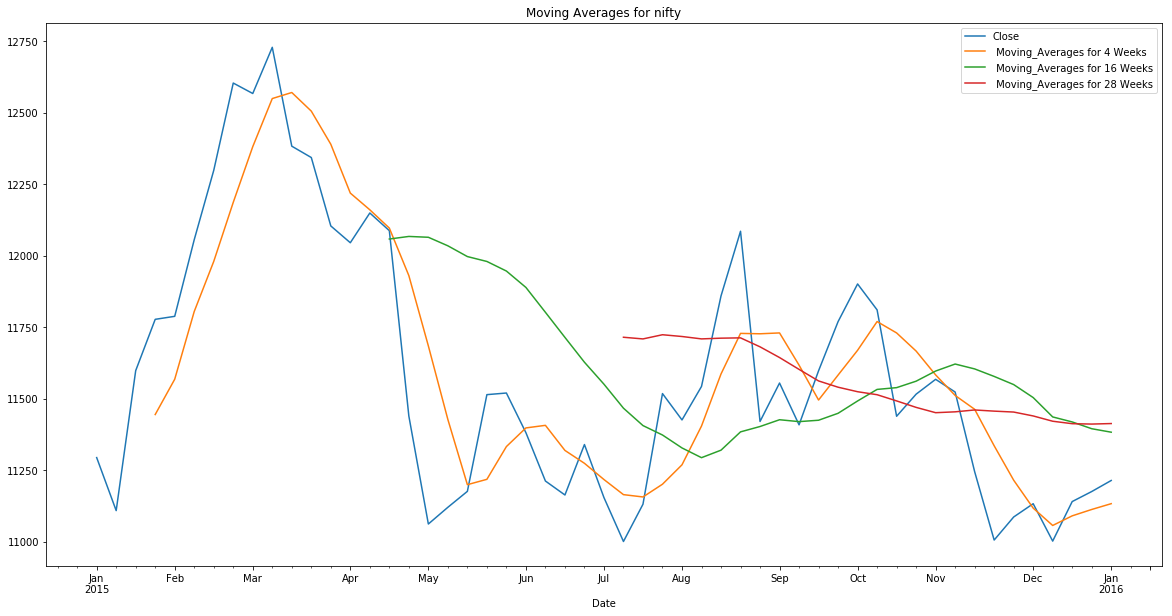

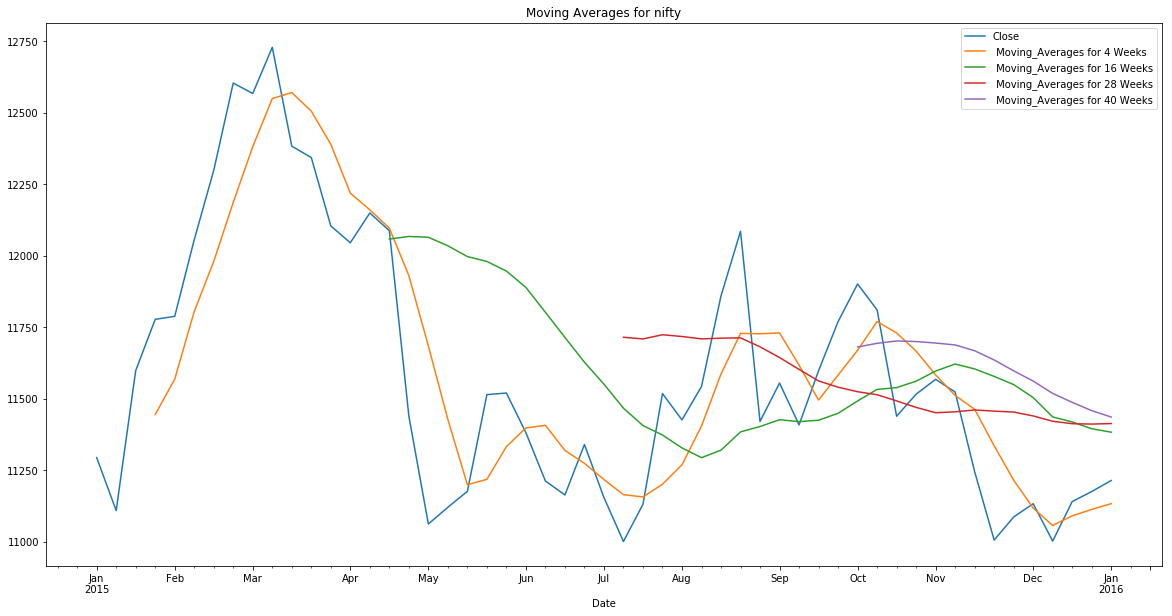

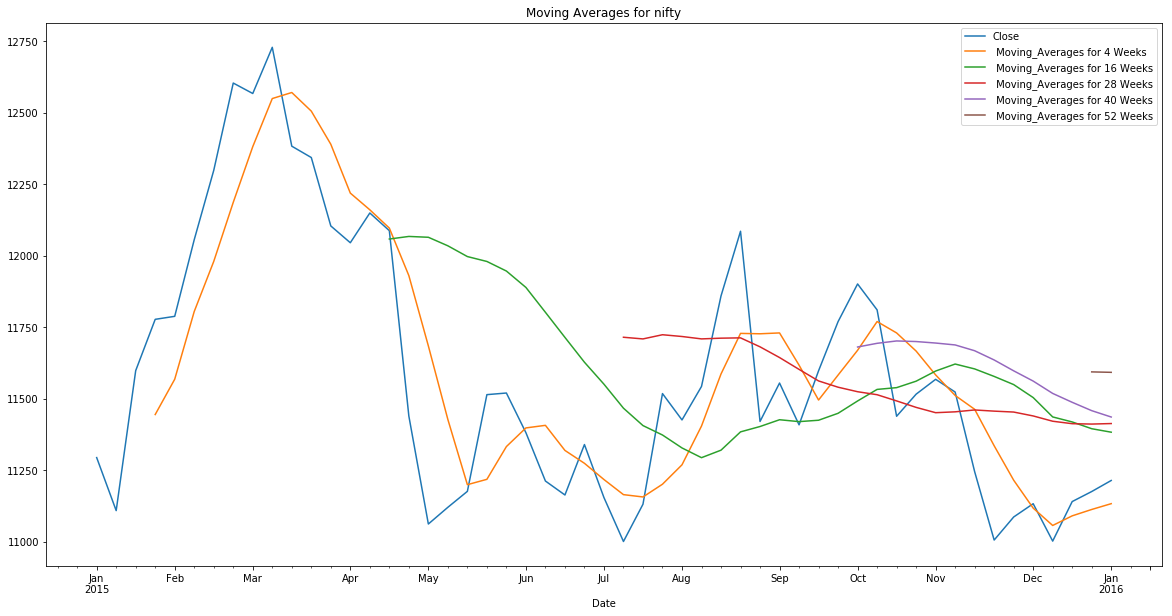

In [15]:
## Moving averages 
weeks = [4 , 16 , 28 , 40 , 52]

# As they are given in weeks we need to resample them as per the requirement

dummy = pd.DataFrame()

dummy['Close'] = nifty['Close'].resample('W').mean() 

# Moving Averages using inbuilt function:
for i in range(len(weeks)):
    
    moving_avg = dummy['Close'].rolling(weeks[i]).mean()
    dummy[" Moving_Averages for " + str(weeks[i])+ " Weeks"] = moving_avg
    print('Following Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for nifty")
    

Following Moving Averages: for 4 weeks: 

 Date
2015-01-04    2562.500000
2015-01-11    2472.130000
2015-01-18    2520.160000
2015-01-25    2508.480000
2015-02-01    2517.087500
2015-02-08    2542.980000
2015-02-15    2482.970000
2015-02-22    2644.262500
2015-03-01    2677.941667
2015-03-08    2721.962500
2015-03-15    2619.490000
2015-03-22    2582.510000
2015-03-29    2562.020000
2015-04-05    2553.583333
2015-04-12    2618.400000
2015-04-19    2585.225000
2015-04-26    2450.250000
2015-05-03    2486.550000
2015-05-10    2506.990000
2015-05-17    2520.940000
2015-05-24    2552.710000
2015-05-31    2608.980000
2015-06-07    2602.010000
2015-06-14    2563.390000
2015-06-21    2522.040000
2015-06-28    2575.840000
2015-07-05    2583.720000
2015-07-12    2568.300000
2015-07-19    2531.880000
2015-07-26    2532.470000
2015-08-02    2499.450000
2015-08-09    2538.200000
2015-08-16    2637.360000
2015-08-23    2704.450000
2015-08-30    2573.610000
2015-09-06    2569.260000
2015-09-13    25

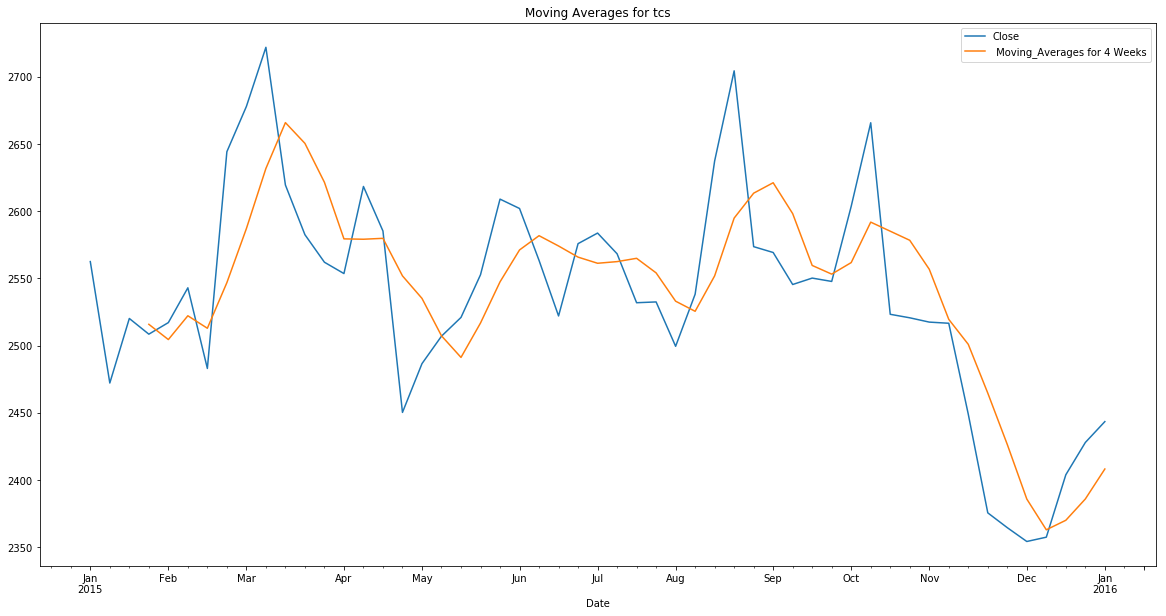

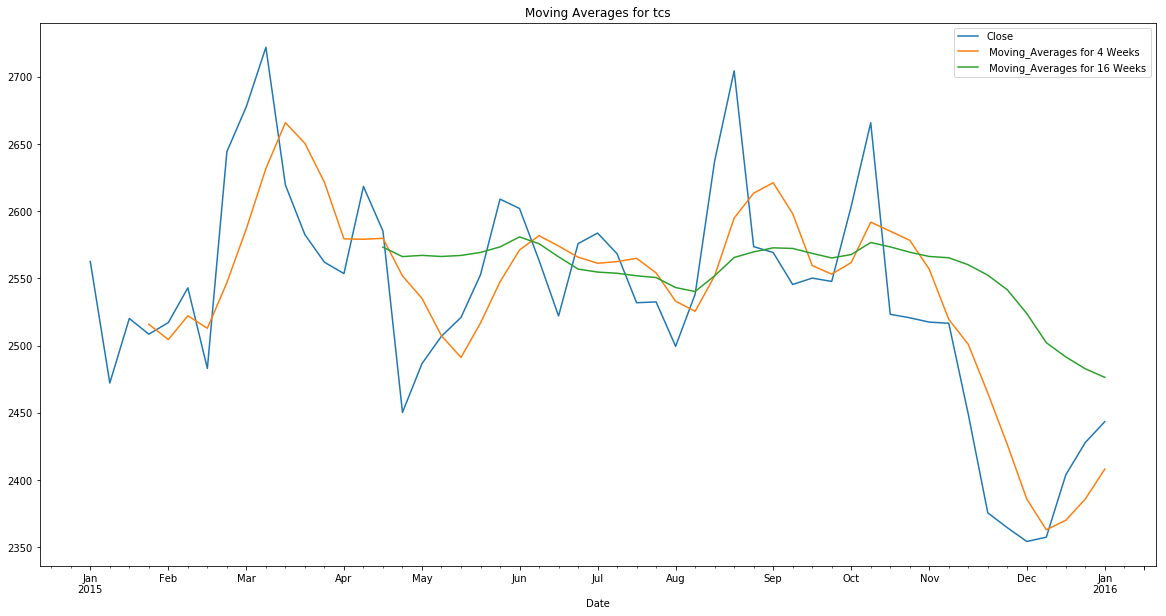

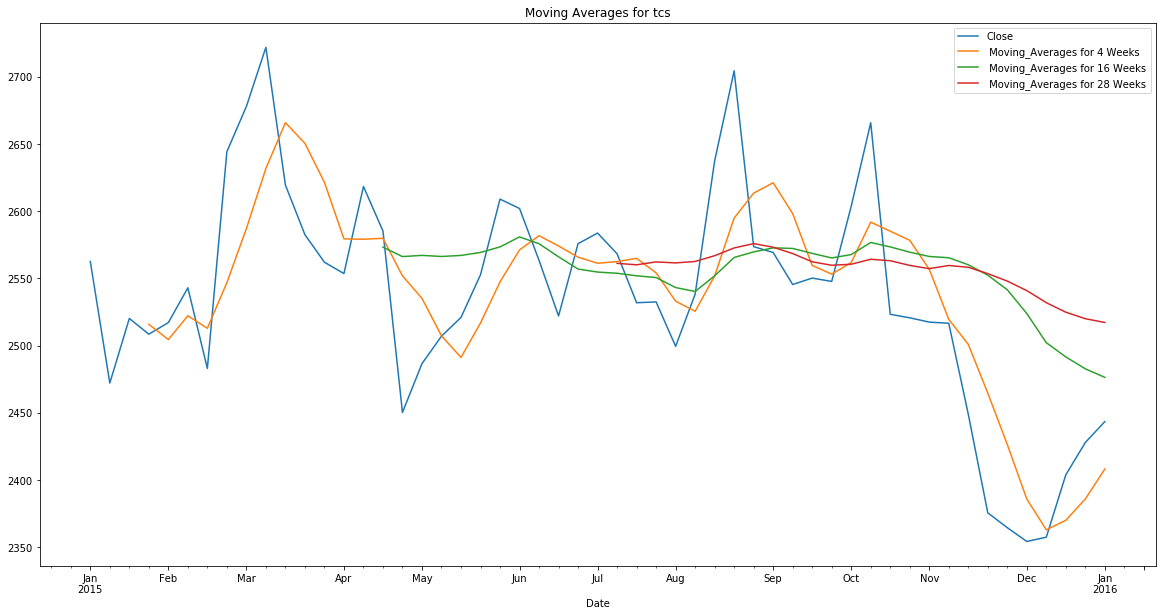

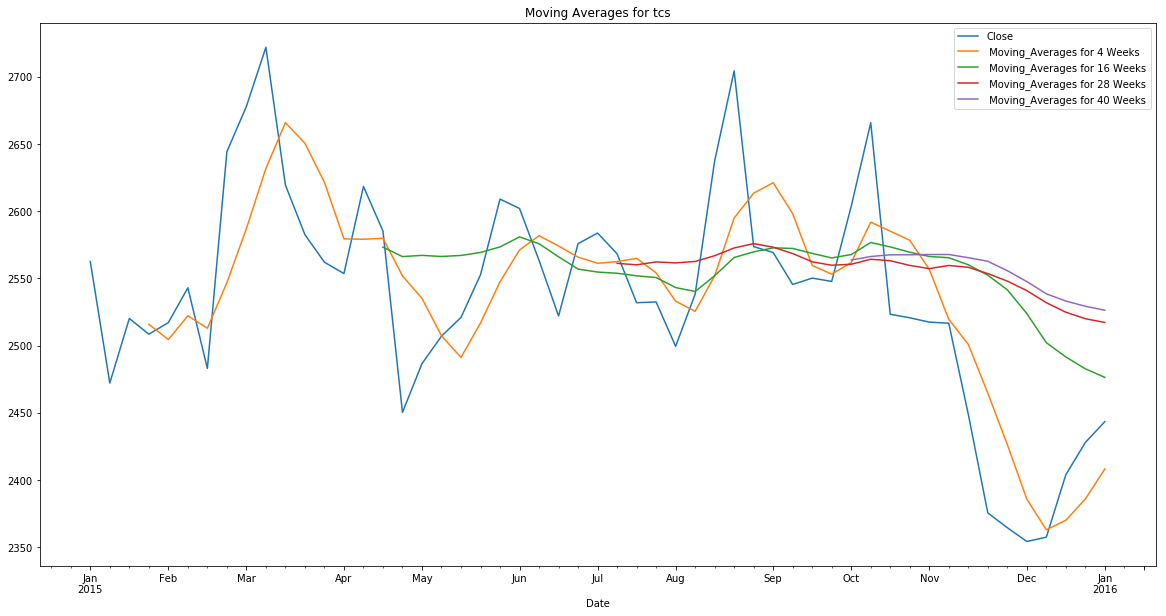

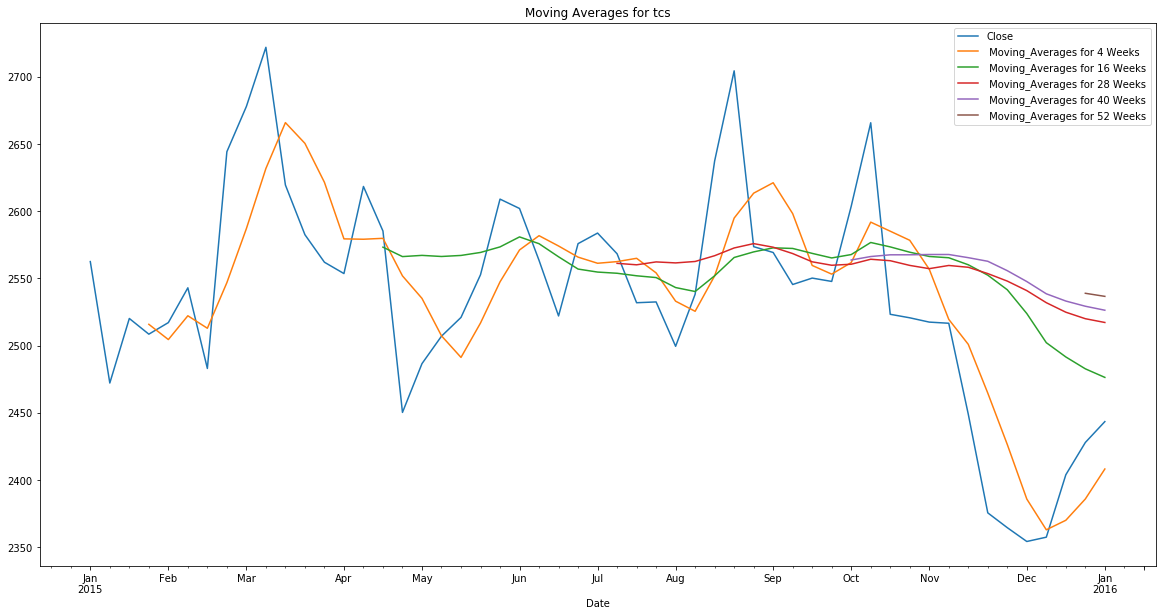

In [16]:
## Moving averages 
weeks = [4 , 16 , 28 , 40 , 52]

# As they are given in weeks we need to resample them as per the requirement

dummy = pd.DataFrame()

dummy['Close'] = tcs['Close'].resample('W').mean() 

# Moving Averages using inbuilt function:
for i in range(len(weeks)):
    
    moving_avg = dummy['Close'].rolling(weeks[i]).mean()
    dummy[" Moving_Averages for " + str(weeks[i])+ " Weeks"] = moving_avg
    print('Following Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for tcs")
    

Following Moving Averages: for 4 weeks: 

 Date
2015-01-04    1993.800000
2015-01-11    1992.310000
2015-01-18    2117.210000
2015-01-25    2161.620000
2015-02-01    2142.112500
2015-02-08    2164.980000
2015-02-15    2283.870000
2015-02-22    2295.762500
2015-03-01    2279.383333
2015-03-08    2277.950000
2015-03-15    2201.790000
2015-03-22    2244.910000
2015-03-29    2202.500000
2015-04-05    2206.766667
2015-04-12    2197.440000
2015-04-19    2206.600000
2015-04-26    2105.930000
2015-05-03    1962.237500
2015-05-10    1955.970000
2015-05-17    1958.800000
2015-05-24    2031.520000
2015-05-31    2006.470000
2015-06-07    2023.410000
2015-06-14    1998.270000
2015-06-21     996.560000
2015-06-28    1003.010000
2015-07-05     990.040000
2015-07-12     959.360000
2015-07-19     979.260000
2015-07-26    1080.530000
2015-08-02    1072.120000
2015-08-09    1081.020000
2015-08-16    1129.360000
2015-08-23    1153.300000
2015-08-30    1087.230000
2015-09-06    1091.230000
2015-09-13    10

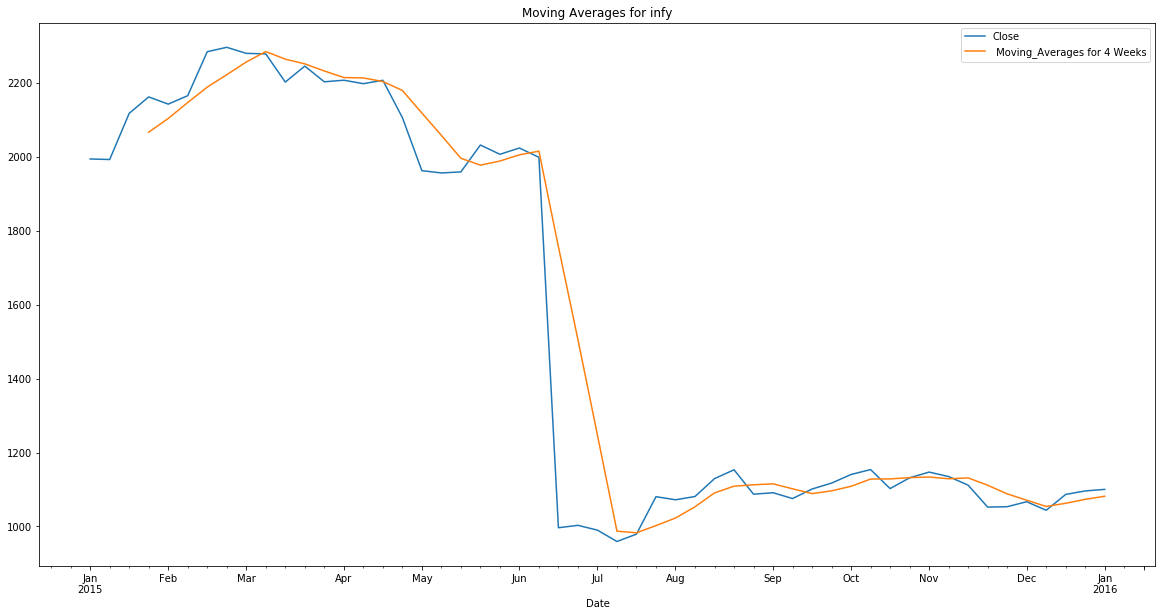

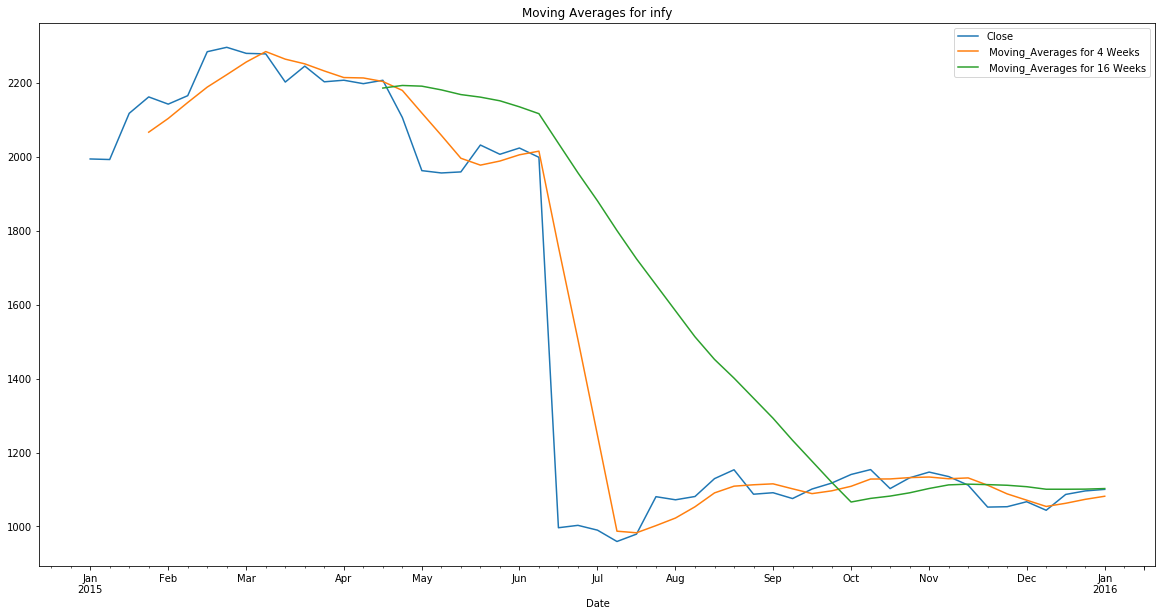

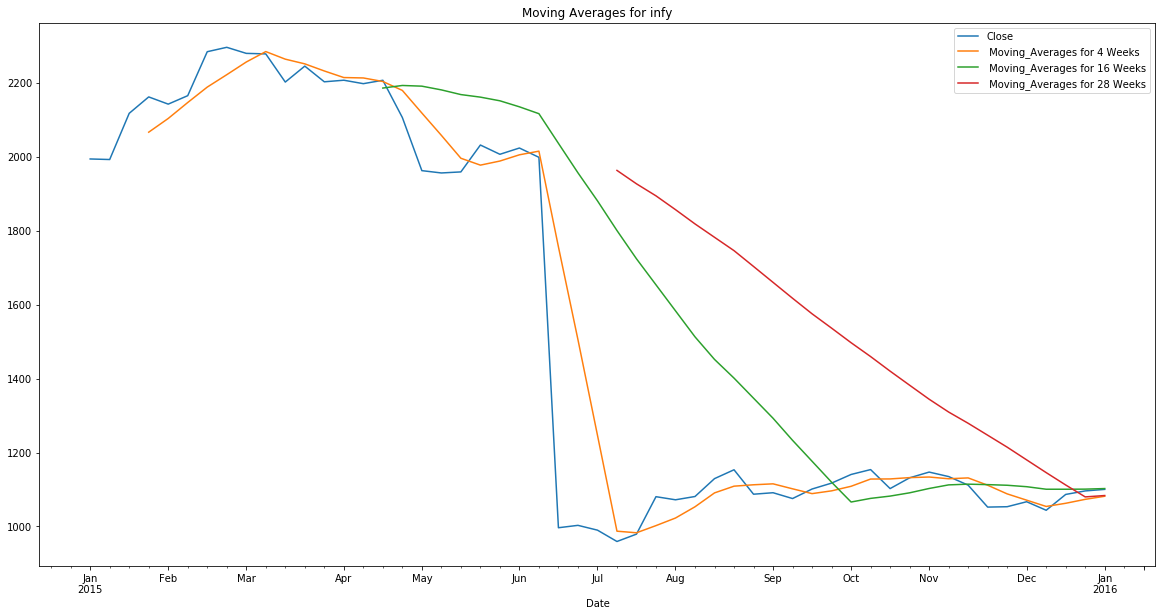

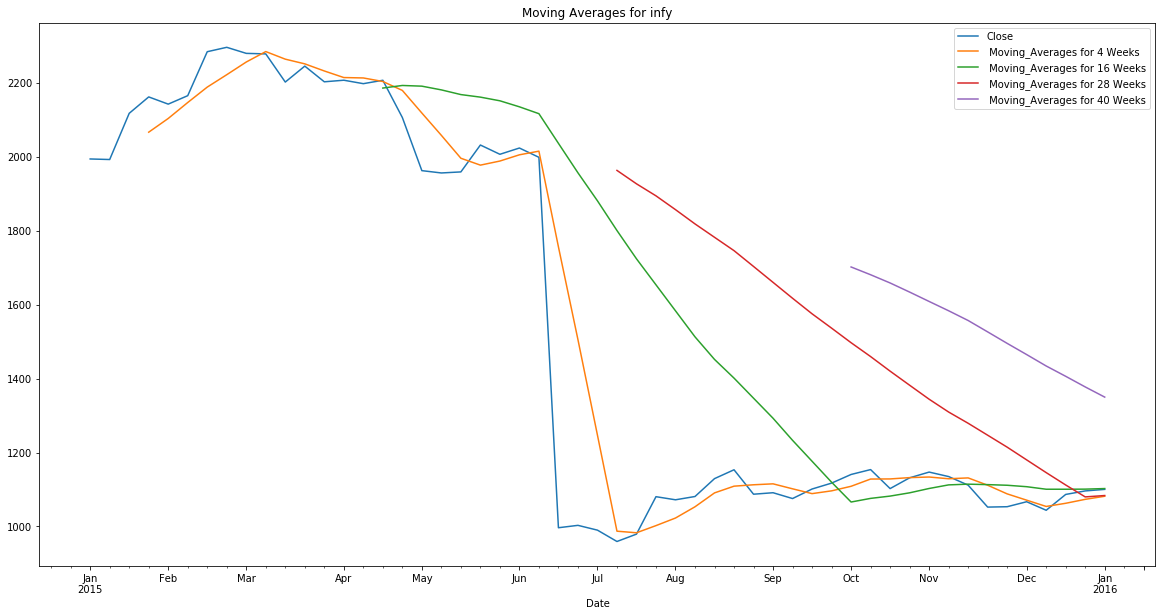

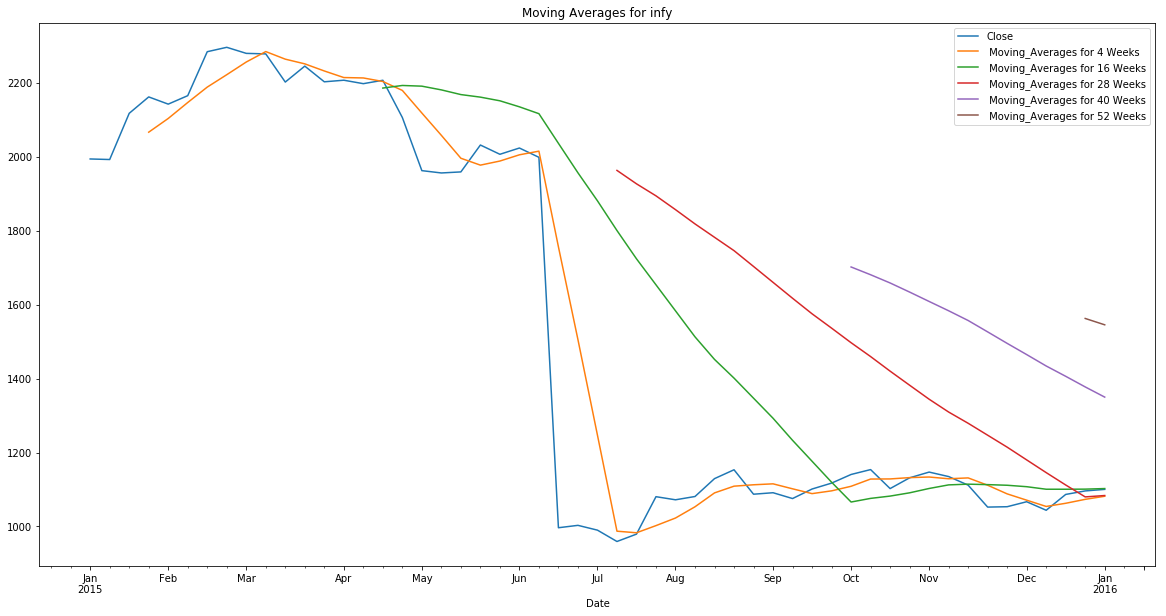

In [17]:
## Moving averages 
weeks = [4 , 16 , 28 , 40 , 52]

# As they are given in weeks we need to resample them as per the requirement

dummy = pd.DataFrame()

dummy['Close'] = infy['Close'].resample('W').mean() 

# Moving Averages using inbuilt function:
for i in range(len(weeks)):
    
    moving_avg = dummy['Close'].rolling(weeks[i]).mean()
    dummy[" Moving_Averages for " + str(weeks[i])+ " Weeks"] = moving_avg
    print('Following Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for infy")
    